<a href="https://colab.research.google.com/github/AlissaClemence21/pf-alissa/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_2007.csv to data_2007 (1).csv


In [ ]:
#load our first data set for 2007-2009 and parse dates so pandas can recognize it
#include dayfirst so we get the right date format for graphs and the rest of the time series
import io
df = pd.read_csv(io.BytesIO(uploaded['data_2007.csv']), parse_dates=True, dayfirst=True,index_col='Date')

In [ ]:
df

,SP500,SP500_open,SP500_high,SP500_low,VIX_close,US5Y,US10Y
Date,,,,,,,
2007-08-01,1465.81,1455.18,1468.38,1439.59,23.670000,4.593,4.759
2007-08-02,1472.20,1465.46,1476.43,1460.58,21.219999,4.600,4.753
2007-08-03,1433.06,1472.18,1473.23,1432.80,25.160000,4.512,4.700
2007-08-06,1467.67,1433.04,1467.67,1427.39,22.940001,4.547,4.731
2007-08-07,1476.71,1467.62,1488.30,1455.80,21.559999,4.575,4.743
...,...,...,...,...,...,...,...
2009-07-27,982.18,978.63,982.49,972.29,24.280001,2.574,3.713
2009-07-28,979.62,981.48,982.35,969.35,25.010000,2.599,3.688
2009-07-29,975.15,977.66,977.76,968.65,25.610001,2.645,3.664


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2007-01-08 to 2009-07-31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SP500       505 non-null    float64
 1   SP500_open  505 non-null    float64
 2   SP500_high  505 non-null    float64
 3   SP500_low   505 non-null    float64
 4   VIX_close   505 non-null    float64
 5   US5Y        505 non-null    float64
 6   US10Y       505 non-null    float64
dtypes: float64(7)
memory usage: 31.6 KB


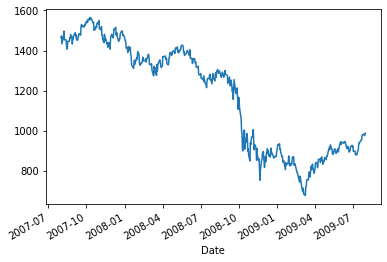

In [ ]:
df['SP500'].plot()

In [ ]:
#Separate our DV to our IVs, which is the SP500 (the price)
SP500_price = df['SP500']

In [ ]:
SP500_price.reset_index(drop=True,inplace=True)
SP500_price.shape

(505, 1)

In [ ]:
#converting our DV to a df
SP500_price = pd.DataFrame(SP500_price)

In [ ]:
#Split the data for train and test, respectively 0.8 and 0.2
#283 is equal to 12th of september 2008, when Lehman Brothers collapsed
train = SP500_price.iloc[:283]
test = SP500_price.iloc[283:290]

In [ ]:
#import data science and model libraries
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
#fit our training data
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
#import DL libraries
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Creating the Model

In [ ]:
test.shape

(7, 1)

In [ ]:
length = 7 #equal to the length of my test set
batch_size = 32

In [ ]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length, batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [ ]:
n_features = 1

In [ ]:
model = Sequential() #initial model
model.add(SimpleRNN(10,input_shape=(length,n_features))) #add params : algo name, number of neurons (has to be at least size of prediction9s
#n features to be changed when I will have more parameters


model.add(Dropout(rate=0.2)) #helps to overcome overfitting. Rather than learning from all the data points, it will learn from 1 out 5, 0.2 is a default rate

model.add(Dense(1)) #this is the output layer (we want to predict only one data point, aka next day price)

model.compile(optimizer ='adam',loss ='mse') #bring the backpropagation with MSE (loss function) and adam optimizer which is stochastic gradient descent

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 10)                120       
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,shuffle=False) #epochs is the number of iterations, we have to stop at a certain point otherwise it will keep learning


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


9/9 [==============================] - 1s 8ms/step - loss: 0.2154
Epoch 2/10
9/9 [==============================] - 0s 8ms/step - loss: 0.1220
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.1209
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0840
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0715
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0542
Epoch 7/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0524
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0413
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0412
Epoch 10/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0390


We see above that the loss function has been minimized
Keep in mind RNN can take longer than ANN

In [ ]:
#plot the loss function
losses = pd.DataFrame(model.history.history)

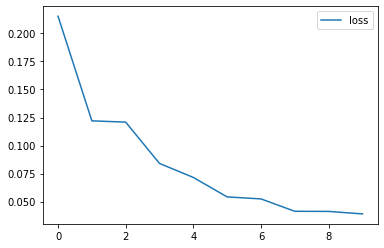

In [ ]:
losses.plot()

Evaluate the test set

In [ ]:
first_eval_batch = scaled_train[-length:] #picks the last values

In [ ]:
first_eval_batch = first_eval_batch.reshape((1,length,1))

In [ ]:
first_eval_batch

array([[[0.06258566],
        [0.07823207],
        [0.15098218],
        [0.02740978],
        [0.04890932],
        [0.09747602],
        [0.10504226]]])

In [ ]:
model.predict(first_eval_batch) #a smaller test set and smaller batch size reduced the prediction error range significantly

array([[0.08753547]], dtype=float32)

Remember to add my own prints to see what is going on in terms of dimensions

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of the [array])
  current_pred = model.predict(current_batch)[0]

  #store prediction
  test_predictions.append(current_pred)

  #update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.08753547], dtype=float32),
 array([0.04228364], dtype=float32),
 array([0.00652307], dtype=float32),
 array([0.08720767], dtype=float32),
 array([0.11644008], dtype=float32),
 array([0.04088718], dtype=float32),
 array([-0.01130093], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[1245.56842327],
       [1229.71942183],
       [1217.19464164],
       [1245.45361609],
       [1255.69197366],
       [1229.23032748],
       [1210.95196397]])

In [ ]:
#add the predictions to the original data
test['predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,SP500,predictions
283,1192.70,1245.568423
284,1213.60,1229.719422
285,1156.39,1217.194642
286,1206.51,1245.453616
287,1255.08,1255.691974
288,1207.09,1229.230327
289,1188.22,1210.951964


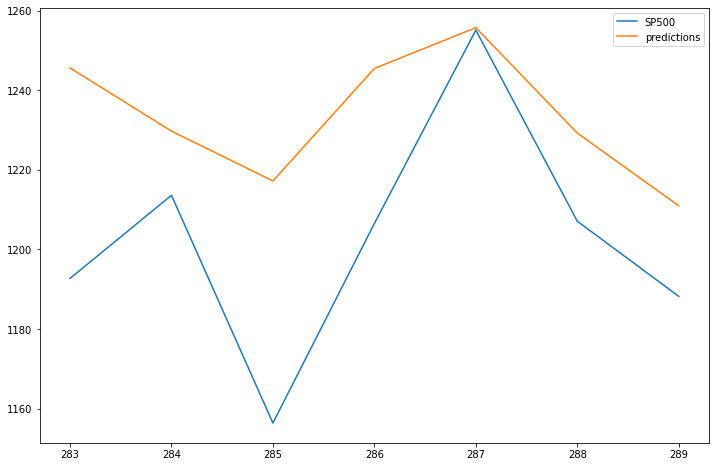

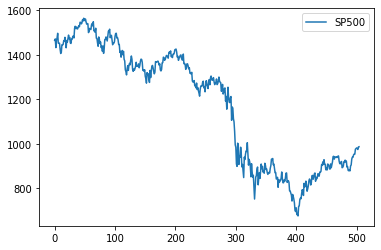

In [ ]:
test.plot(figsize=(12,8))
SP500_price.plot()

Create LSTM Model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='var_loss',patience=0)

In [ ]:
length

7

In [ ]:
scaled_test.shape

(7, 1)

In [ ]:
length = 6 #must be length-1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=32)

In [ ]:
model = Sequential()
model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer ='adam',loss='mse')

In [ ]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


1/9 [==>...........................] - ETA: 11s - loss: 0.2924

9/9 [==============================] - 2s 55ms/step - loss: 0.1403 - val_loss: 0.0153
Epoch 2/20
1/9 [==>...........................] - ETA: 0s - loss: 0.1281

9/9 [==============================] - 0s 8ms/step - loss: 0.0607 - val_loss: 0.0285
Epoch 3/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0476

9/9 [==============================] - 0s 8ms/step - loss: 0.0267 - val_loss: 0.0417
Epoch 4/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0193

9/9 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0468
Epoch 5/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0191

9/9 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.0416
Epoch 6/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0174

9/9 [==============================] - 0s 8ms/step - loss: 0.0128 - val_loss: 0.0337
Epoch 7/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0195

9/9 [==============================] - 0s 9ms/step - loss: 0.0126 - val_loss: 0.0291
Epoch 8/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0202

9/9 [==============================] - 0s 8ms/step - loss: 0.0124 - val_loss: 0.0271
Epoch 9/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0201

9/9 [==============================] - 0s 8ms/step - loss: 0.0130 - val_loss: 0.0257
Epoch 10/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0135

9/9 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.0233
Epoch 11/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0116

9/9 [==============================] - 0s 8ms/step - loss: 0.0102 - val_loss: 0.0201
Epoch 12/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0091

9/9 [==============================] - 0s 8ms/step - loss: 0.0109 - val_loss: 0.0181
Epoch 13/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0165

9/9 [==============================] - 0s 8ms/step - loss: 0.0110 - val_loss: 0.0164
Epoch 14/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0132

9/9 [==============================] - 0s 8ms/step - loss: 0.0096 - val_loss: 0.0153
Epoch 15/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0092

9/9 [==============================] - 0s 9ms/step - loss: 0.0093 - val_loss: 0.0137
Epoch 16/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0124

9/9 [==============================] - 0s 10ms/step - loss: 0.0090 - val_loss: 0.0123
Epoch 17/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0189

9/9 [==============================] - 0s 8ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 18/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0103

9/9 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.0110
Epoch 19/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0123

9/9 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0103
Epoch 20/20
1/9 [==>...........................] - ETA: 0s - loss: 0.0130

9/9 [==============================] - 0s 8ms/step - loss: 0.0088 - val_loss: 0.0100


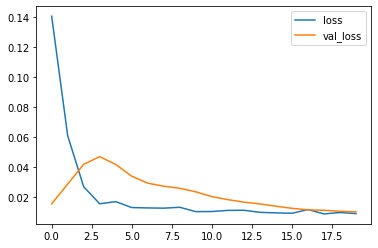

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_batch)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [394]:
true_predictions = scaler.inverse_transform(test_predictions)

ValueError: ignored

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM_predictions']= true_predictions
test.plot(figsize=(12,8))

ValueError: ignored